# Experiment list :  Question No - 02

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Generate synthetic data
def generate_data(num_points=1000):
    # Generate random x values between -10 and 10
    x = np.random.uniform(-10, 10, num_points)

    # Calculate corresponding y values using the polynomial: 3x³ + 7x² - 12x + 2
    y = 3 * x**3 + 7 * x**2 - 12 * x + 2

    # Add some noise to make it more realistic
    y += np.random.normal(0, 50, num_points)

    return x, y

In [4]:
# Create training and test datasets
x_train, y_train = generate_data(800)  # 800 training points
x_test, y_test = generate_data(200)    # 200 test points

# Normalize the input data
x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)

x_train_norm = (x_train - x_mean) / x_std
x_test_norm = (x_test - x_mean) / x_std
y_train_norm = (y_train - y_mean) / y_std
y_test_norm = (y_test - y_mean) / y_std

In [5]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history = model.fit(
    x_train_norm.reshape(-1, 1),
    y_train_norm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.8262 - mae: 0.6161 - val_loss: 0.4819 - val_mae: 0.4304
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4803 - mae: 0.4435 - val_loss: 0.2983 - val_mae: 0.3776
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2785 - mae: 0.3869 - val_loss: 0.1927 - val_mae: 0.3657
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1947 - mae: 0.3633 - val_loss: 0.1548 - val_mae: 0.3376
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1569 - mae: 0.3281 - val_loss: 0.1200 - val_mae: 0.2921
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1249 - mae: 0.2914 - val_loss: 0.0948 - val_mae: 0.2557
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0988 - mae: 0.2552 - val_loss: 0.0712 - val_mae: 0.2156
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0725 - mae: 0.2112 - val_loss: 0.0554 - val_mae: 0.1868
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [7]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation Mean absolute error
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()


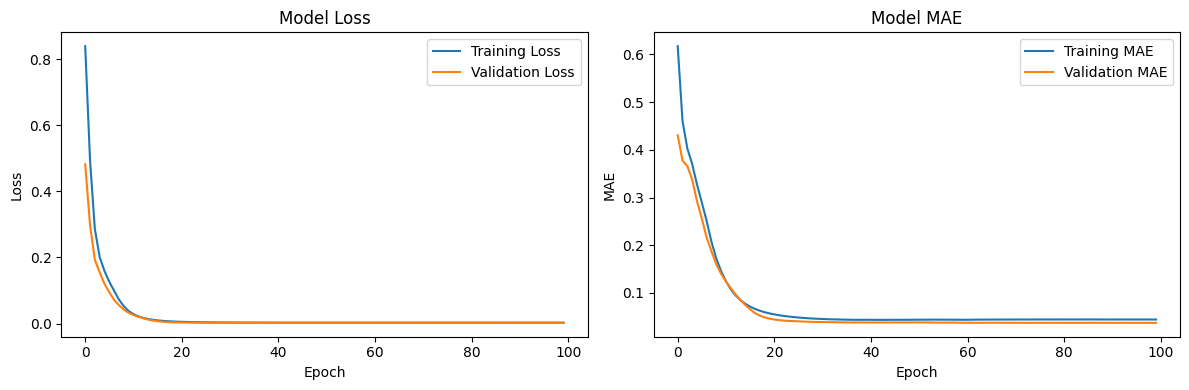

In [8]:
# Function to plot predictions vs actual values
def plot_predictions():
    # Generate predictions
    x_plot = np.linspace(-10, 10, 200)
    x_plot_norm = (x_plot - x_mean) / x_std
    y_pred_norm = model.predict(x_plot_norm.reshape(-1, 1))
    y_pred = y_pred_norm * y_std + y_mean

    # Calculate true polynomial values
    y_true = 3 * x_plot**3 + 7 * x_plot**2 - 12 * x_plot + 2

    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, alpha=0.5, label='Training Data')
    plt.plot(x_plot, y_true, 'r-', label='True Polynomial')
    plt.plot(x_plot, y_pred, 'g--', label='Model Predictions')
    plt.title('Polynomial Regression Results')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results
plot_training_history(history)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


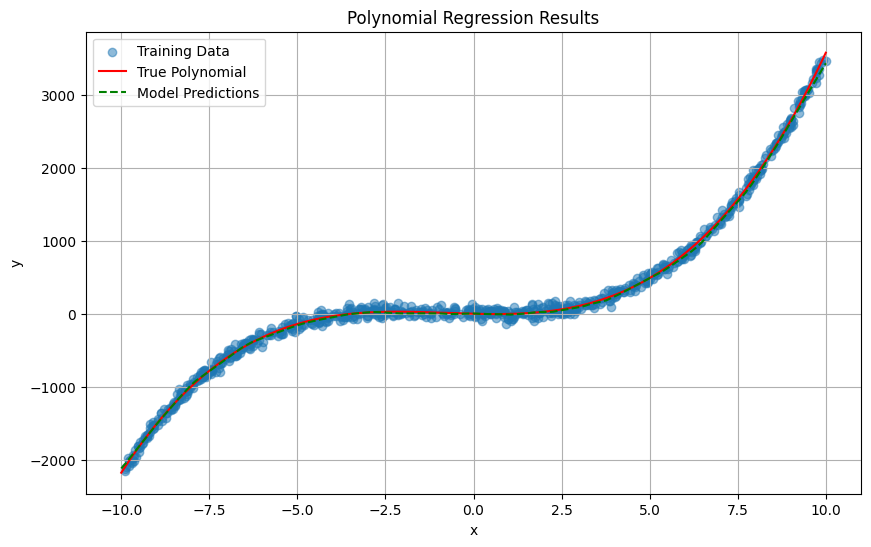

In [9]:
plot_predictions()